## ***Introduction***



*    ***Project/Task by Hassan Kapadia as a part of Internship at The Sparks Foundation (TSF) under Graduate Rotational Internship Program (GRIP) March 2021.***

*   ***Email:*** hsn.kapadia@gmail.com
---


*  ***Task:*** Predict the percentage of a student based on the no. of study hours using Linear Regression.


*   ***Linear Regression*** attempts to model the relationship between two variables by fitting a linear equation to observed data.


*   ***Dataset Link***: http://bit.ly/w-data

# ***Importing Libraries***

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# ***Loading the Data***

In [60]:
data=pd.read_csv('/content/student_scores - student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# ***Visualizing the Data***

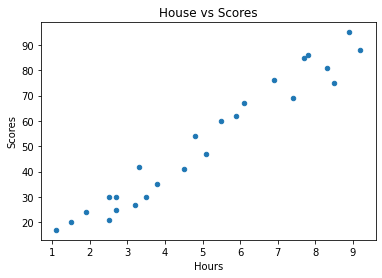

In [106]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('House vs Scores')
plt.show()

# ***Train-Test Split***

In [91]:
Train_X,Test_X,Train_Y,Test_Y=model_selection.train_test_split(data['Hours'],data['Scores'])
print('=>Train_X Shape ',Train_X.shape)
print('=>Train_Y Shape: ',Train_Y.shape)
print('=>Test_X Shape: ',Test_X.shape)
print('=>Test_Y Shape: ',Test_Y.shape)

=>Train_X Shape  (18,)
=>Train_Y Shape:  (18,)
=>Test_X Shape:  (7,)
=>Test_Y Shape:  (7,)


# ***Visualizing Training and Testing Data***

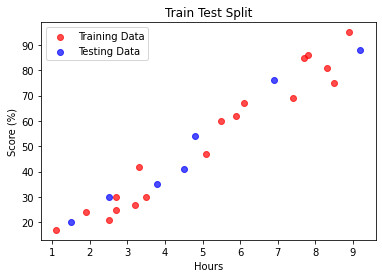

In [92]:
plt.scatter(Train_X,Train_Y,label='Training Data',color='r',alpha=.7)
plt.scatter(Test_X,Test_Y,label='Testing Data',color='b',alpha=.7)
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Score (%)")
plt.title('Train Test Split')
plt.show()

# ***Training the Model***

In [93]:
model=LinearRegression()
model.fit(Train_X.values.reshape(-1,1),Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# ***Testing the Model***

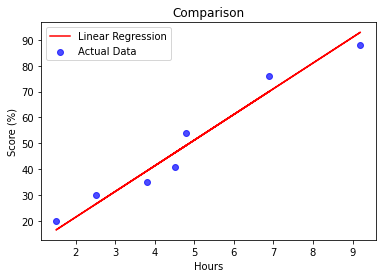

In [94]:
prediction=model.predict(Test_X.values.reshape(-1,1))

plt.plot(Test_X,prediction,label='Linear Regression',color='r')
plt.scatter(Test_X,Test_Y,label='Actual Data',color='b',alpha=.7)
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Score (%)")
plt.title("Comparison")
plt.show()


# ***Analyzing the Model***

In [95]:
print("**** Actual vs Predicted Data ****")
print("="*32)
df=pd.DataFrame({'Actual Data':Test_Y,'Predicted Data':prediction})
print(df)
print("="*32)

print("\n**** Statistics ****")
print("="*35)
print("R2 Score: ","{:.2f}".format(r2_score(Test_Y,prediction)))
print("\nMean Absolute Error(MAE): ","{:.2f}".format(mean_absolute_error(Test_Y,prediction)))
print("\nMean Squared Error(MSE): ","{:.2f}".format(mean_squared_error(Test_Y,prediction)))
print("\nRoot Mean Squared Error(MSE): ","{:.2f}".format(mean_squared_error(Test_Y,prediction,squared=False)))
print("="*35)

**** Actual vs Predicted Data ****
    Actual Data  Predicted Data
16           30       26.395405
21           54       49.243181
5            20       16.461590
23           76       70.104193
12           41       46.263036
6            88       92.951969
22           35       39.309365

**** Statistics ****
R2 Score:  0.96

Mean Absolute Error(MAE):  4.62

Mean Squared Error(MSE):  21.96

Root Mean Squared Error(MSE):  4.69


# ***Predicting Data***

In [96]:
#Predicting Score based on Study Hours
hrs=float(input('\nEnter study hours: '))
score=model.predict([[hrs]])
print("="*90)
print("Number of study hours = {0} hours/day".format(hrs))
print("\nPredicted score = {0} %".format("{:.2f}".format(score[0])))
print('\nConclusion: The predicted score if a student studies for {0} hours/day is {1} %'.format(hrs,"{:.2f}".format(score[0])))
print("="*90)


Enter study hours: 9.25
Number of study hours = 9.25 hours/day

Predicted score = 93.45 %

Conclusion: The predicted score if a student studies for 9.25 hours/day is 93.45 %


# ***Manual Prediction***

In [105]:
#Linear Equation is y=m*x+c
x=float(input('\nEnter x: '))
m=model.coef_
c=model.intercept_
y=m*x+c
print("="*50)
print('\nCoefficient (m): ',m[0])
print('\nIntercept (c): ',c)
print('\nLinear Equation is y = {0} * x + {1}'.format(m[0],c))
print('\ny = {0} if x = {1}'.format("{:.2f}".format(y[0]),x))
print("="*50)


Enter x: 9.25

Coefficient (m):  9.933815491966518

Intercept (c):  1.5608662883268707

Linear Equation is y = 9.933815491966518 * x + 1.5608662883268707

y = 93.45 if x = 9.25
